In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("final.csv")

# Parse the datetime
data['OccupancyDateTime'] = pd.to_datetime(data['OccupancyDateTime'])



In [4]:
data.head()

,Unnamed: 0,OccupancyDateTime,PaidOccupancy
0,0,2023-12-07 12:00:00,0.0
1,1,2023-12-07 12:05:00,0.0
2,2,2023-12-07 12:10:00,0.0
3,3,2023-12-07 12:15:00,0.0
4,4,2023-12-07 12:20:00,0.0


In [3]:
# Extract features like hour of the day, day of the week, etc.
data['hour'] = data['OccupancyDateTime'].dt.hour
data['day_of_week'] = data['OccupancyDateTime'].dt.dayofweek

# Select relevant features
features = ['hour', 'day_of_week', 'PaidOccupancy']
data = data[features]



In [4]:
# Normalize the PaidOccupancy values
scaler = MinMaxScaler(feature_range=(0, 1))
data['PaidOccupancy'] = scaler.fit_transform(data[['PaidOccupancy']])




In [5]:
# Convert data to numpy array
data_array = data.values

# Function to create sequences
def create_sequences(data, sequence_length):
    xs, ys = [], []
    for i in range(len(data) - sequence_length):
        x = data[i:(i + sequence_length)]
        y = data[i + sequence_length, -1]  # Target is PaidOccupancy
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# Define the sequence length
sequence_length = 6  # for example, 10 time steps



In [27]:
# Create sequences
X, y = create_sequences(data_array, sequence_length)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.008, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10350, 6, 3), (84, 6, 3), (10350,), (84,))

In [28]:
from keras.models import Sequential
from keras.layers import GRU, Dense

GRU Model

In [29]:
# Define the GRU model
model = Sequential()
model.add(GRU(units=50, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

In [30]:

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
259/259 [==============================] - 3s 5ms/step - loss: 0.0474 - val_loss: 0.0098
Epoch 2/50
259/259 [==============================] - 1s 4ms/step - loss: 0.0063 - val_loss: 0.0037
Epoch 3/50
259/259 [==============================] - 1s 6ms/step - loss: 0.0035 - val_loss: 0.0024
Epoch 4/50
259/259 [==============================] - 1s 3ms/step - loss: 0.0030 - val_loss: 0.0026
Epoch 5/50
259/259 [==============================] - 1s 3ms/step - loss: 0.0030 - val_loss: 0.0024
Epoch 6/50
259/259 [==============================] - 1s 3ms/step - loss: 0.0029 - val_loss: 0.0022
Epoch 7/50
259/259 [==============================] - 1s 3ms/step - loss: 0.0028 - val_loss: 0.0021
Epoch 8/50
259/259 [==============================] - 1s 3ms/step - loss: 0.0028 - val_loss: 0.0021
Epoch 9/50
259/259 [==============================] - 1s 3ms/step - loss: 0.0030 - val_loss: 0.0021
Epoch 10/50
259/259 [==============================] - 1s 3ms/step - loss: 0.0029 - val_loss: 0.0026

In [31]:
# Evaluate the model on the test set
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")


3/3 [==============================] - 0s 2ms/step - loss: 0.0025
Test Loss: 0.0025232068728655577


3/3 [==============================] - 0s 2ms/step


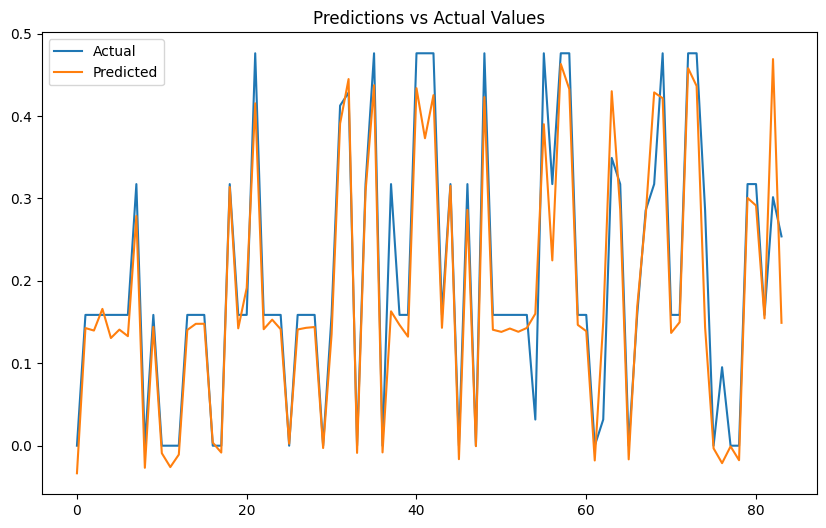

In [32]:
# Evaluate the model on the test set
test_loss = model.evaluate(X_test, y_test)

# Make predictions
predictions = model.predict(X_test)

# Plot predictions and actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')

plt.title('Predictions vs Actual Values')
plt.legend()
plt.show()

In [33]:

rmse = mean_squared_error(y_test, predictions, squared=False)

print("RMSE:", rmse)

RMSE: 0.05023152933603505


1D-CNN

In [34]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense



In [35]:
# Define the 1D CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))



In [36]:
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)



Epoch 1/50
259/259 [==============================] - 1s 3ms/step - loss: 0.0227 - val_loss: 0.0079
Epoch 2/50
259/259 [==============================] - 1s 4ms/step - loss: 0.0072 - val_loss: 0.0061
Epoch 3/50
259/259 [==============================] - 0s 2ms/step - loss: 0.0066 - val_loss: 0.0050
Epoch 4/50
259/259 [==============================] - 0s 1ms/step - loss: 0.0076 - val_loss: 0.0054
Epoch 5/50
259/259 [==============================] - 0s 1ms/step - loss: 0.0065 - val_loss: 0.0039
Epoch 6/50
259/259 [==============================] - 0s 2ms/step - loss: 0.0054 - val_loss: 0.0040
Epoch 7/50
259/259 [==============================] - 1s 2ms/step - loss: 0.0068 - val_loss: 0.0037
Epoch 8/50
259/259 [==============================] - 0s 1ms/step - loss: 0.0061 - val_loss: 0.0079
Epoch 9/50
259/259 [==============================] - 0s 1ms/step - loss: 0.0061 - val_loss: 0.0066
Epoch 10/50
259/259 [==============================] - 0s 1ms/step - loss: 0.0060 - val_loss: 0.0077

In [37]:
# Evaluate the model on the test set
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")


3/3 [==============================] - 0s 3ms/step - loss: 0.0040
Test Loss: 0.004049229901283979


3/3 [==============================] - 0s 3ms/step


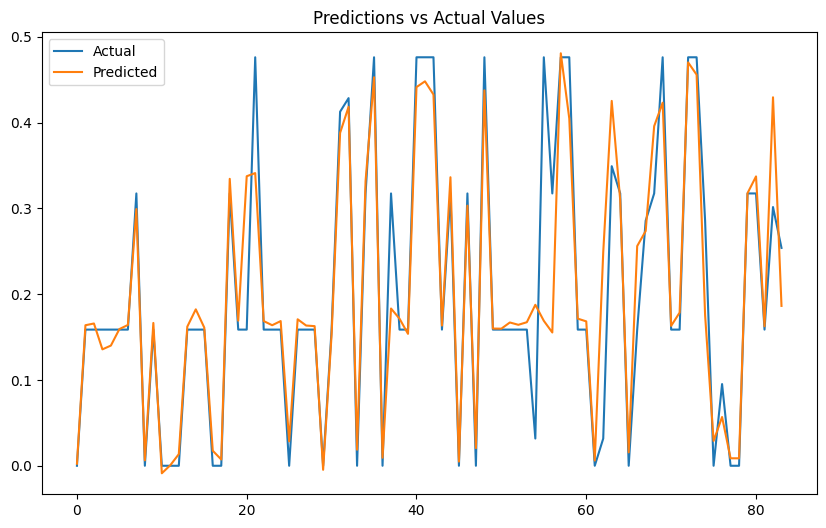

In [38]:
# Evaluate the model on the test set
test_loss = model.evaluate(X_test, y_test)

# Make predictions
predictions = model.predict(X_test)

# Plot predictions and actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')

plt.title('Predictions vs Actual Values')
plt.legend()
plt.show()

In [39]:

rmse = mean_squared_error(y_test, predictions, squared=False)

print("RMSE:", rmse)

RMSE: 0.06363355934420617


LSTM


In [40]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [41]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')



In [42]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)



Epoch 1/50
259/259 [==============================] - 4s 7ms/step - loss: 0.0100 - val_loss: 0.0033
Epoch 2/50
259/259 [==============================] - 2s 6ms/step - loss: 0.0039 - val_loss: 0.0032
Epoch 3/50
259/259 [==============================] - 1s 5ms/step - loss: 0.0033 - val_loss: 0.0029
Epoch 4/50
259/259 [==============================] - 1s 4ms/step - loss: 0.0031 - val_loss: 0.0021
Epoch 5/50
259/259 [==============================] - 1s 4ms/step - loss: 0.0029 - val_loss: 0.0022
Epoch 6/50
259/259 [==============================] - 1s 2ms/step - loss: 0.0029 - val_loss: 0.0022
Epoch 7/50
259/259 [==============================] - 2s 6ms/step - loss: 0.0029 - val_loss: 0.0028
Epoch 8/50
259/259 [==============================] - 1s 4ms/step - loss: 0.0029 - val_loss: 0.0021
Epoch 9/50
259/259 [==============================] - 2s 7ms/step - loss: 0.0028 - val_loss: 0.0020
Epoch 10/50
259/259 [==============================] - 1s 4ms/step - loss: 0.0027 - val_loss: 0.0021

In [43]:
# Evaluate the model on the test set
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")


3/3 [==============================] - 0s 3ms/step - loss: 0.0024
Test Loss: 0.0023808160331100225


3/3 [==============================] - 0s 4ms/step


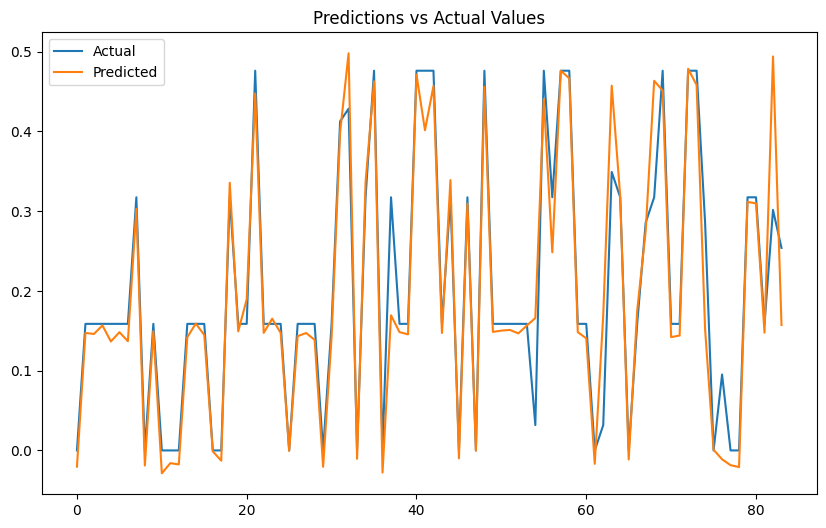

In [44]:
# Evaluate the model on the test set
test_loss = model.evaluate(X_test, y_test)

# Make predictions
predictions = model.predict(X_test)

# Plot predictions and actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')

plt.title('Predictions vs Actual Values')
plt.legend()
plt.show()

In [45]:
rmse = mean_squared_error(y_test, predictions, squared=False)

print("RMSE:", rmse)

RMSE: 0.04879360454939142
